In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import warnings
warnings.filterwarnings('ignore')
register_matplotlib_converters()

In [2]:
df = pd.read_csv('C:/Users/moham/Desktop/itemFive.csv')

In [3]:
df = df[(df['store'] == 1) & (df['item'] == 5)]
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%y')
df.set_index('date', inplace=True)
train_df = df.loc[:'2021-12-31']
test_df = df.loc['2022-01-01':]

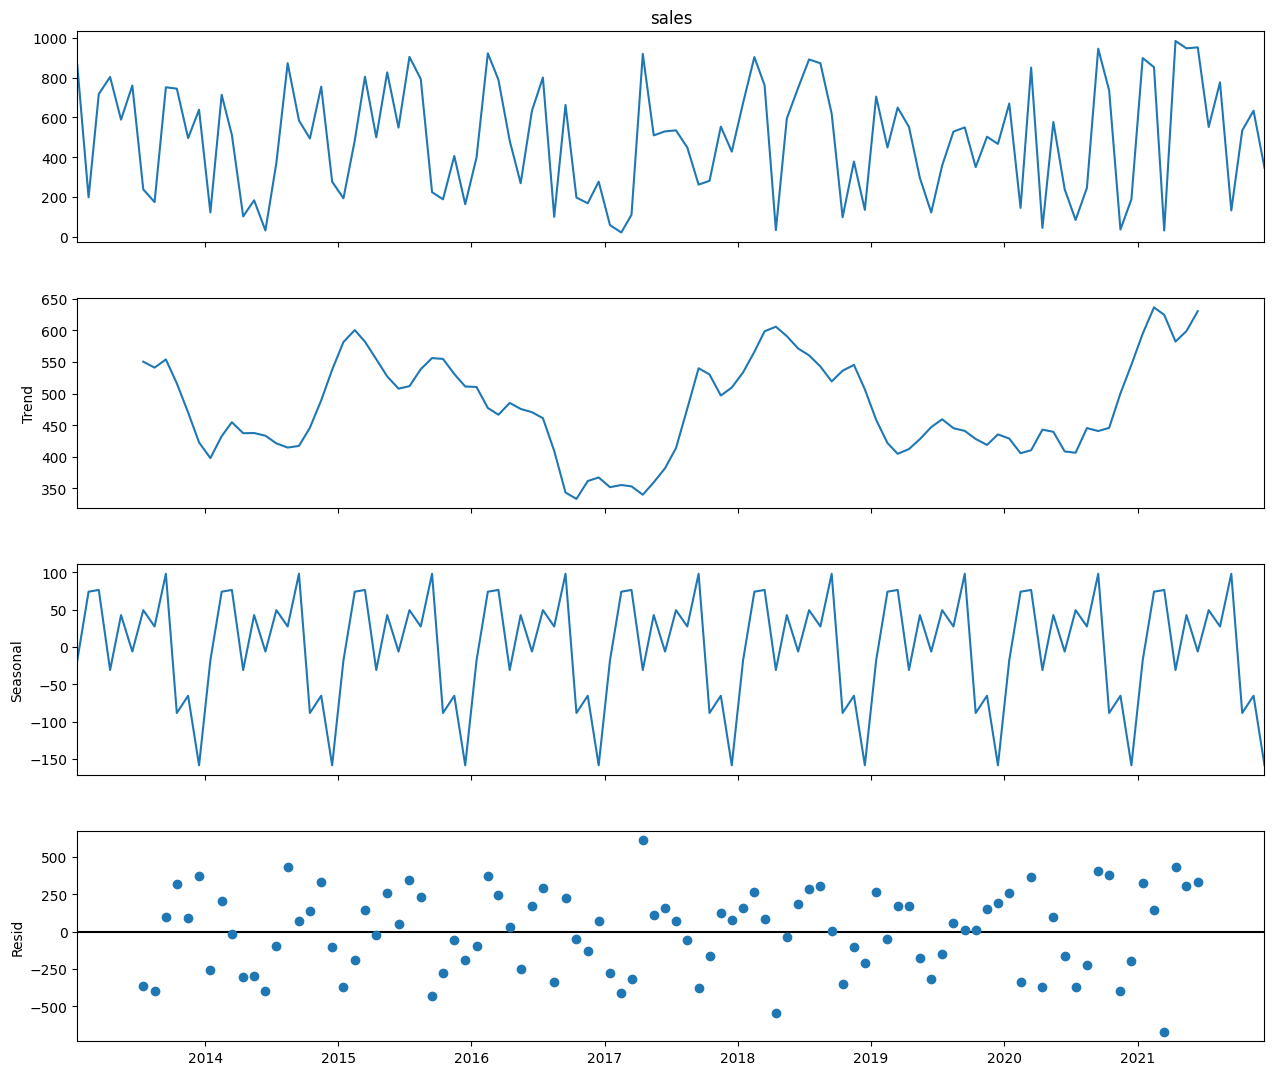

In [4]:
result = seasonal_decompose(train_df['sales'].astype(float), model='additive', period=12)
fig = result.plot()
fig.set_size_inches(14, 12)

In [5]:
hw_model_1 = ExponentialSmoothing(train_df['sales'], trend='add', seasonal='add', seasonal_periods=12)
hw_fit_1 = hw_model_1.fit(optimized=True)
pred_fit_1 = hw_fit_1.forecast(steps=len(test_df))
pred_fit_1.index = test_df.index

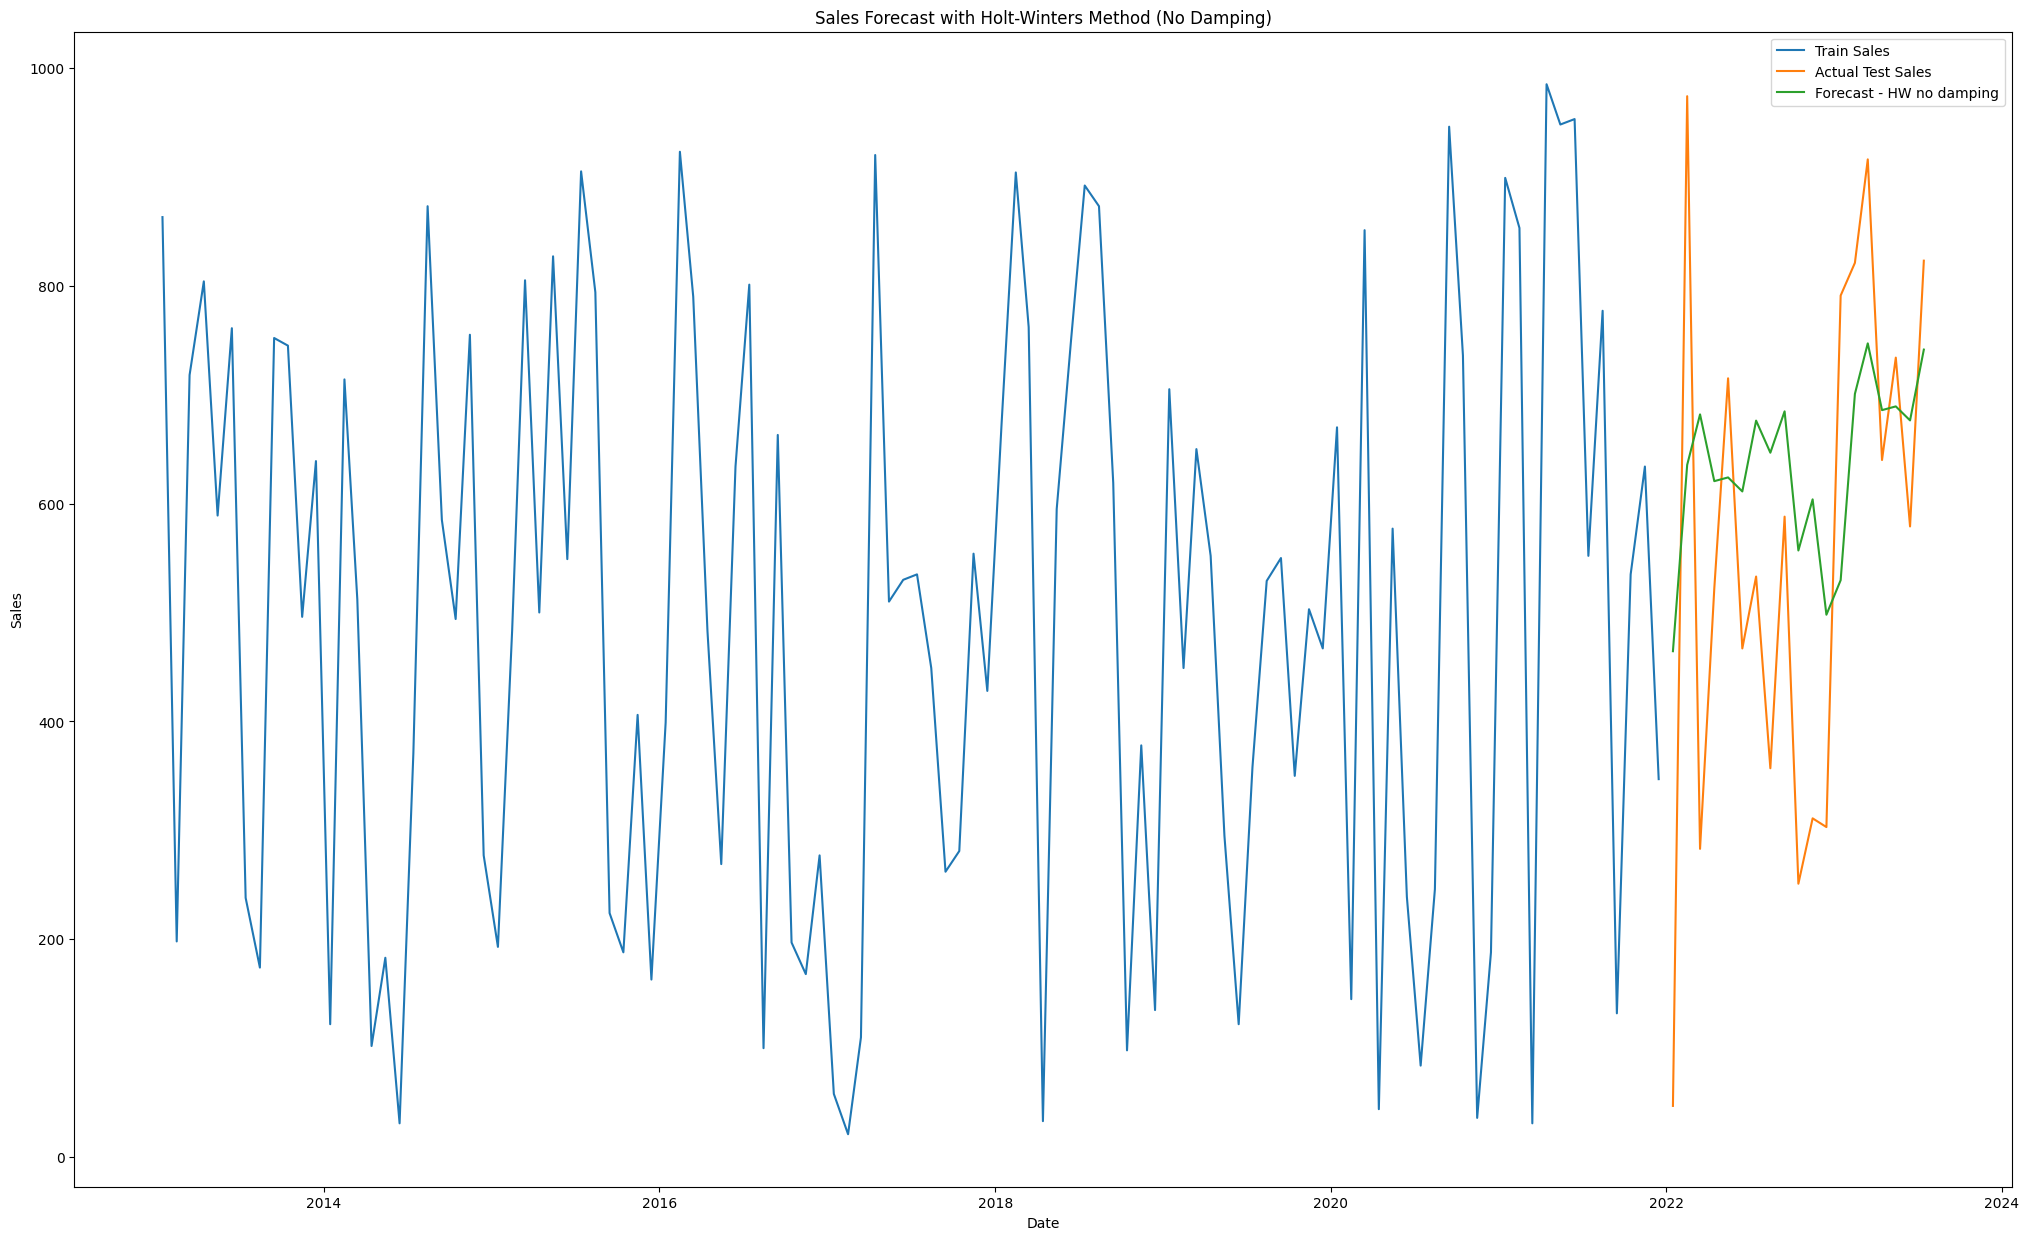

In [6]:
plt.figure(figsize=(25,15))
plt.plot(train_df['sales'], label='Train Sales')
plt.plot(test_df['sales'], label='Actual Test Sales')
plt.plot(pred_fit_1, label='Forecast - HW no damping')
plt.title('Sales Forecast with Holt-Winters Method (No Damping)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

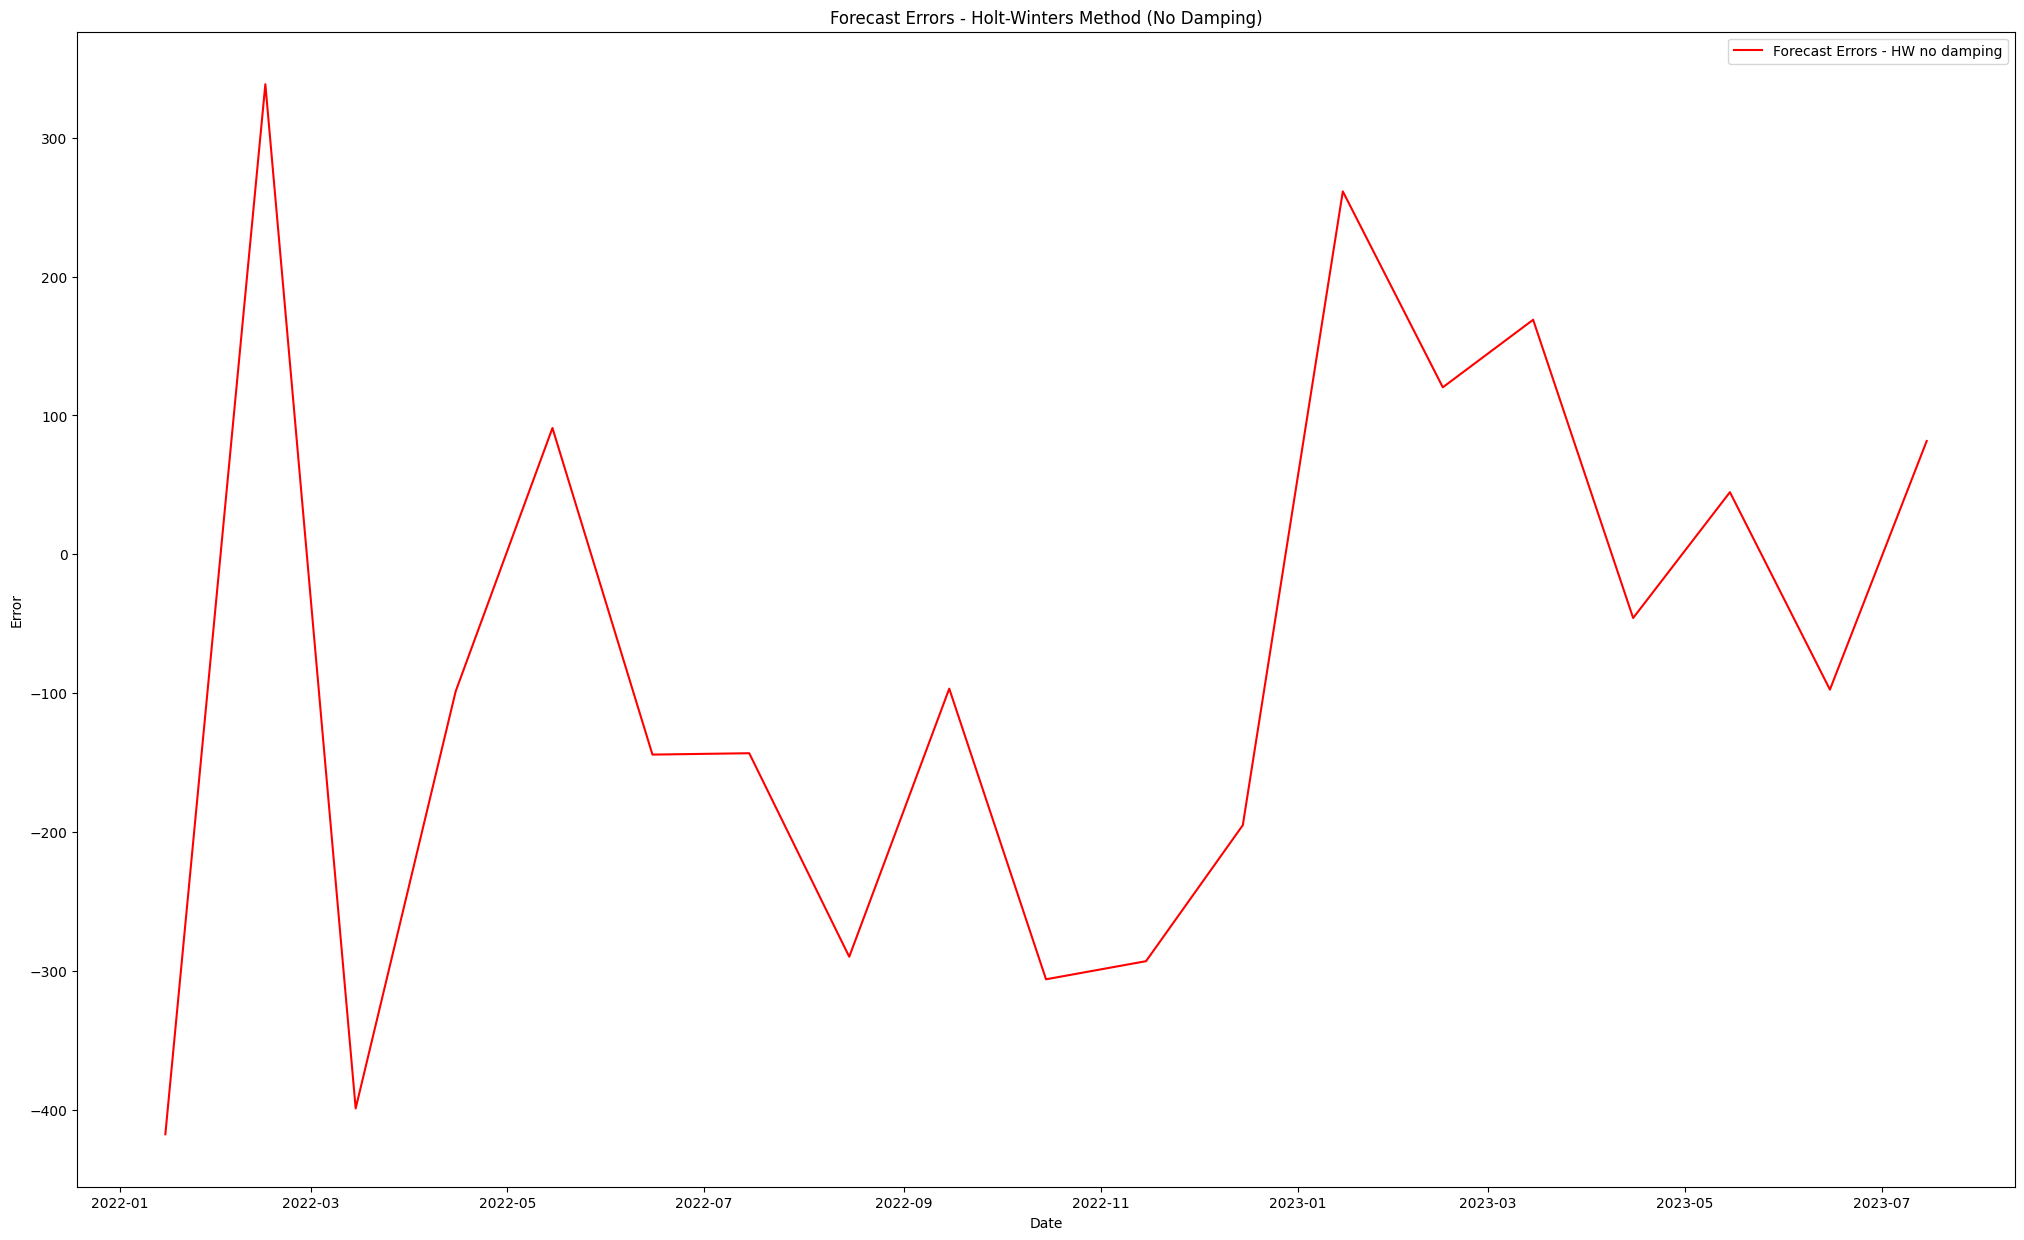

In [7]:
errors_1 = test_df['sales'] - pred_fit_1
plt.figure(figsize=(25,15))
plt.plot(errors_1, label='Forecast Errors - HW no damping', color='red')
plt.title('Forecast Errors - Holt-Winters Method (No Damping)')
plt.xlabel('Date')
plt.ylabel('Error')
plt.legend()
plt.show()

In [8]:
hw_model_2 = ExponentialSmoothing(train_df['sales'], trend='add', seasonal='add', seasonal_periods=12, damped=True)
hw_fit_2 = hw_model_2.fit(optimized=True)
pred_fit_2 = hw_fit_2.forecast(steps=len(test_df))
pred_fit_2.index = test_df.index

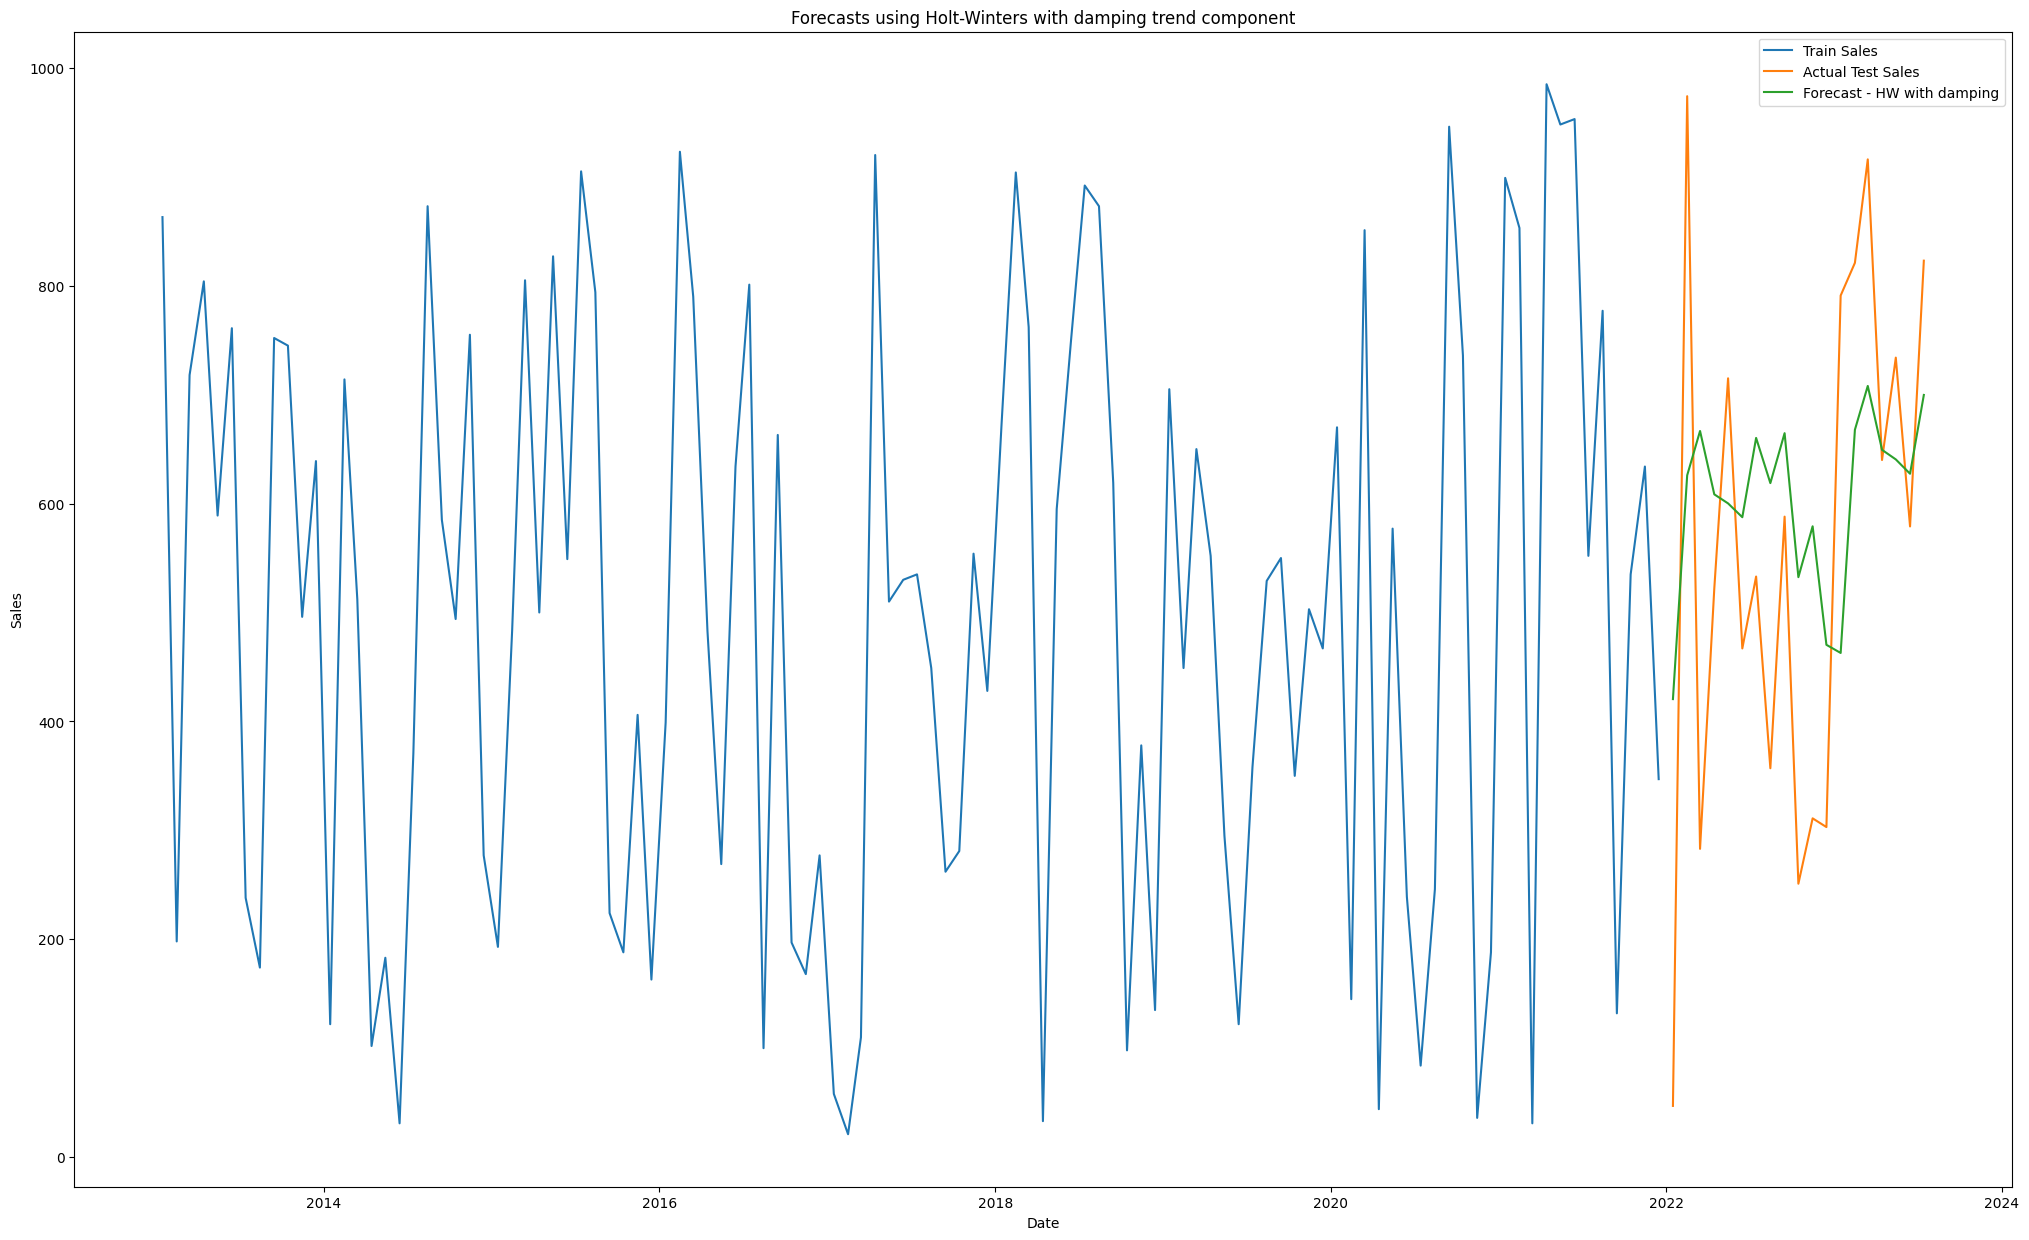

In [9]:
plt.figure(figsize=(25,15))
plt.plot(train_df['sales'], label='Train Sales')
plt.plot(test_df['sales'], label='Actual Test Sales')
plt.plot(pred_fit_2, label='Forecast - HW with damping')
plt.title('Forecasts using Holt-Winters with damping trend component')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

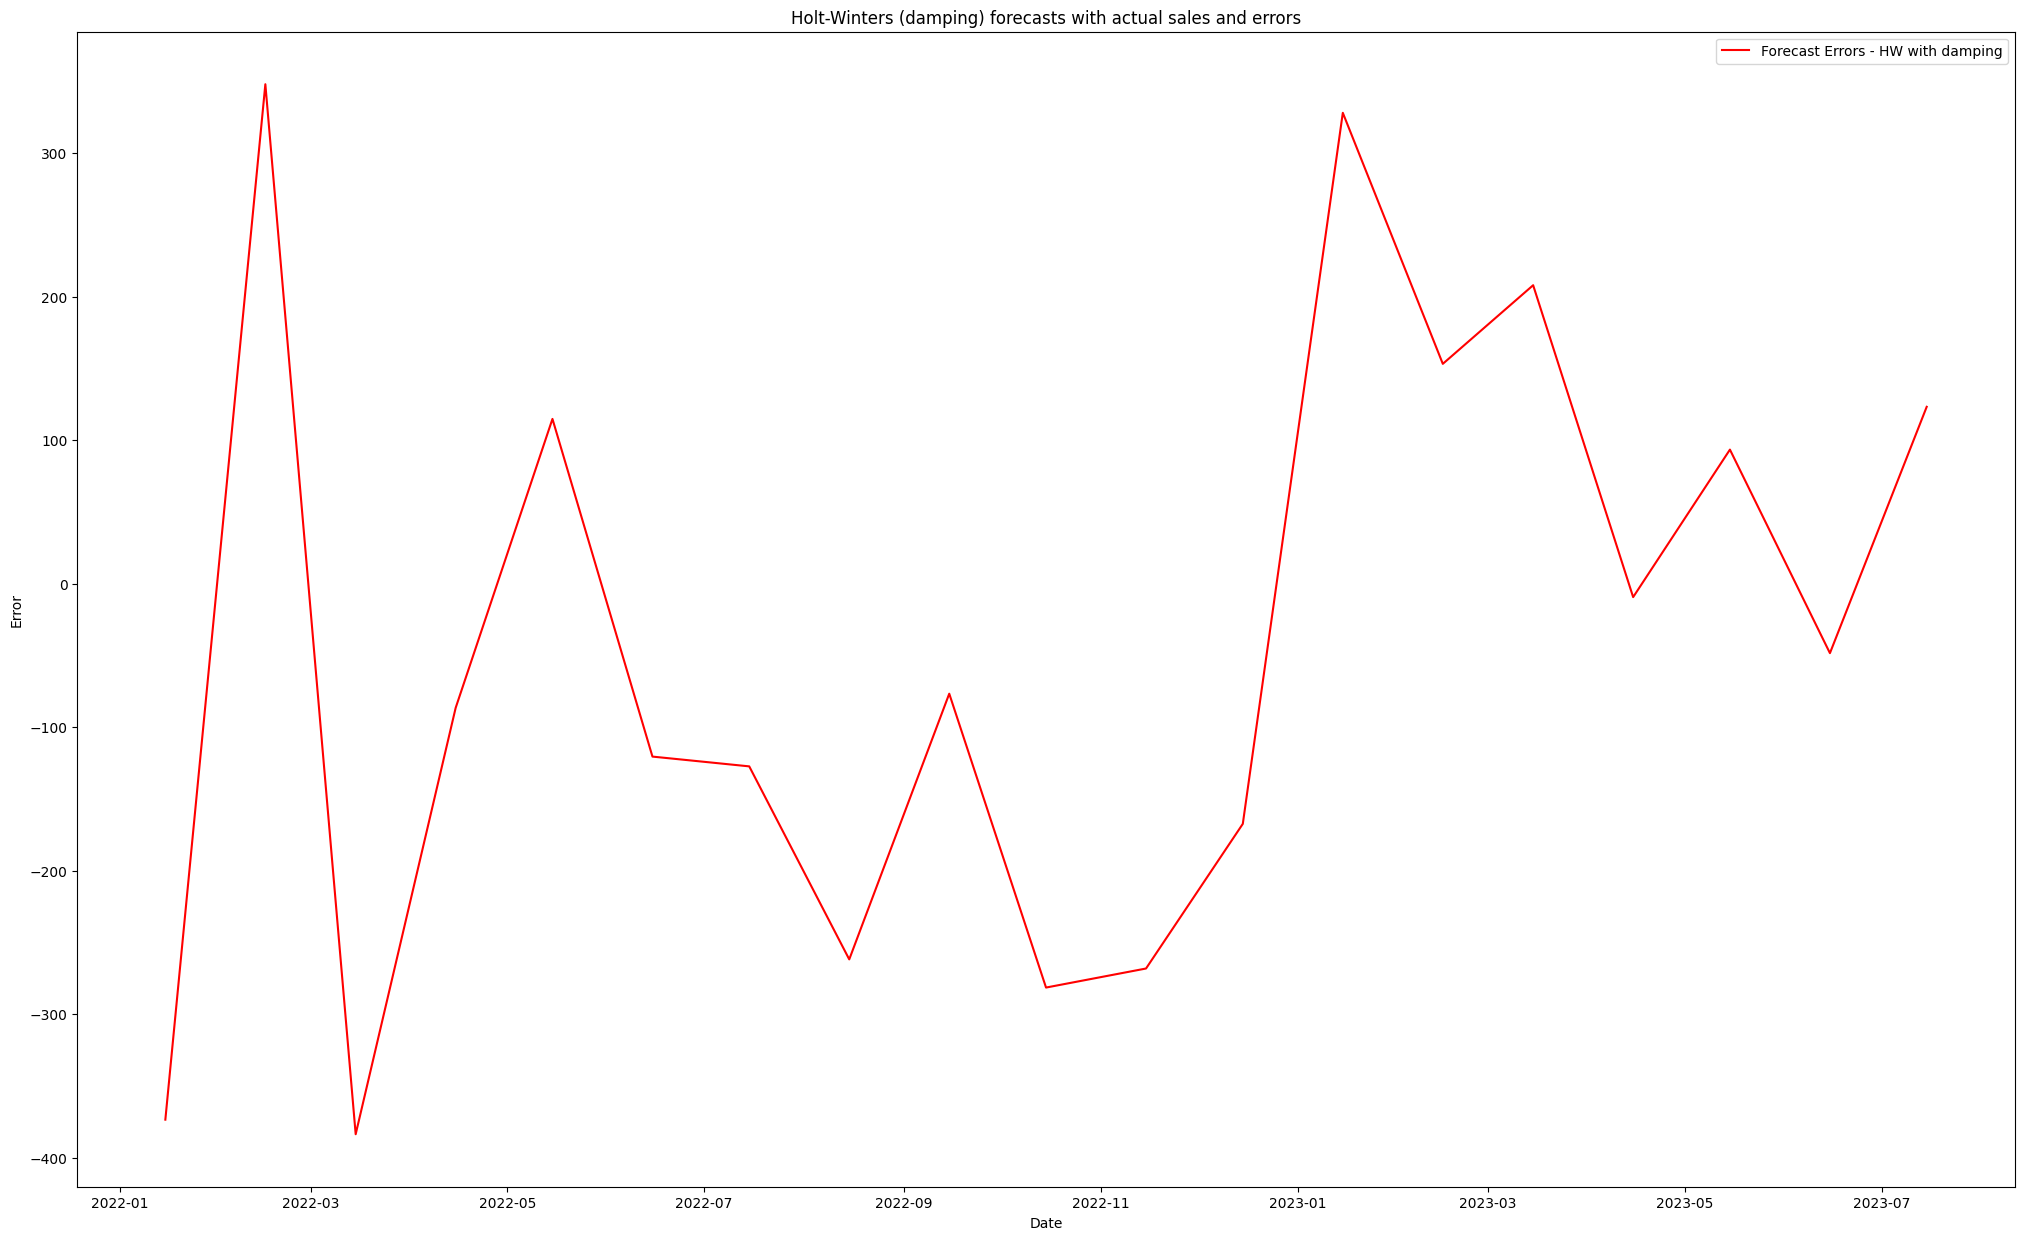

In [10]:
errors_2 = test_df['sales'] - pred_fit_2
plt.figure(figsize=(25,15))
plt.plot(errors_2, label='Forecast Errors - HW with damping', color='red')
plt.title('Holt-Winters (damping) forecasts with actual sales and errors')
plt.xlabel('Date')
plt.ylabel('Error')
plt.legend()
plt.show()

In [11]:
def mae(y_true, y_pred): return np.mean(np.abs(y_true - y_pred))
def rmse(y_true, y_pred): return np.sqrt(np.mean((y_true - y_pred) ** 2))
def mape(y_true, y_pred): return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

result_df_hw = pd.DataFrame({
    'total_sales': [test_df['sales'].sum()],
    'total_pred_sales': [pred_fit_1.sum()],
    'holt_winters_overall_error': [errors_1.sum()],
    'MAE': [mae(test_df['sales'], pred_fit_1)],
    'RMSE': [rmse(test_df['sales'], pred_fit_1)],
    'MAPE': [mape(test_df['sales'], pred_fit_1)]
})

result_df_hwd = pd.DataFrame({
    'total_sales': [test_df['sales'].sum()],
    'total_pred_sales': [pred_fit_2.sum()],
    'holt_winters_overall_error': [errors_2.sum()],
    'MAE': [mae(test_df['sales'], pred_fit_2)],
    'RMSE': [rmse(test_df['sales'], pred_fit_2)],
    'MAPE': [mape(test_df['sales'], pred_fit_2)]
})

# Display the results as tables
print("Results for Holt-Winters Model Without Damping:")
display(result_df_hw)
print("\nResults for Holt-Winters Model With Damping:")
display(result_df_hwd)

Results for Holt-Winters Model Without Damping:


,total_sales,total_pred_sales,holt_winters_overall_error,MAE,RMSE,MAPE
0,10655,12074.002214,-1419.002214,191.154872,223.53615,86.175944



Results for Holt-Winters Model With Damping:


,total_sales,total_pred_sales,holt_winters_overall_error,MAE,RMSE,MAPE
0,10655,11490.321342,-835.321342,188.076275,219.269709,79.398391
